<a href="https://colab.research.google.com/github/noamgafni/STA160Project/blob/main/Logistic_vs_Tail_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop a Logistic Regression model to predict the 'Low' value in cryptocurrency data. This involves loading and preprocessing "/content/train_data.csv", "/content/val_data.csv", and "/content/test_data.csv", training the model, and then evaluating its performance on both validation and test sets, with a particular focus on 'tail risk prediction' and visualization of results.

## Load Datasets

### Subtask:
Load 'training_data.csv', 'val_data.csv', and 'test_data.csv' into separate pandas DataFrames. Display the first few rows, column information, and basic statistics for each to ensure they are loaded correctly.


**Reasoning**:
The previous code failed because of incorrect filenames and relative paths. I will regenerate the full code block, correcting the filenames to 'training_data.csv', 'val_data.csv', and 'test_data.csv' and using their absolute paths from '/content/' to load them into pandas DataFrames. Then, I will display the first few rows, column information, and basic statistics for each DataFrame as requested in the subtask.



In [ ]:
import pandas as pd

# Load training data
train_df = pd.read_csv("/content/train_data.csv")
print("\n--- Training Data (train_df) ---")
print("First 5 rows:")
print(train_df.head())
print("\nColumn Information:")
train_df.info()
print("\nBasic Statistics:")
print(train_df.describe())

# Load validation data
val_df = pd.read_csv("/content/val_data.csv")
print("\n--- Validation Data (val_df) ---")
print("First 5 rows:")
print(val_df.head())
print("\nColumn Information:")
val_df.info()
print("\nBasic Statistics:")
print(val_df.describe())

# Load test data
test_df = pd.read_csv("/content/test_data.csv")
print("\n--- Test Data (test_df) ---")
print("First 5 rows:")
print(test_df.head())
print("\nColumn Information:")
test_df.info()
print("\nBasic Statistics:")
print(test_df.describe())


--- Training Data (train_df) ---
First 5 rows:
         Date   Coin   Name      Open      High       Low     Close  \
0  2021-07-12  1INCH  1INCH  2.518235  2.587015  2.376835  2.425992   
1  2021-07-13  1INCH  1INCH  2.422219  2.454345  2.287377  2.319626   
2  2021-07-14  1INCH  1INCH  2.320493  2.360377  2.178263  2.295866   
3  2021-07-15  1INCH  1INCH  2.296512  2.348247  2.127000  2.143274   
4  2021-07-16  1INCH  1INCH  2.146183  2.205100  1.956874  1.968316   

      Volume   Returns    Vol_5d  ...  Returns_Lag_2  Returns_Lag_3  \
0  222145233 -0.036984  0.047632  ...      -0.035315       0.026218   
1  210255307 -0.044835  0.032333  ...       0.011471      -0.035315   
2  213989919 -0.010296  0.023310  ...      -0.036984       0.011471   
3  202690477 -0.068776  0.031146  ...      -0.044835      -0.036984   
4  208690875 -0.085156  0.028974  ...      -0.010296      -0.044835   

   Returns_Lag_5  Returns_Lag_7  Volume_Lag_1  Volume_Lag_2  Volume_Lag_3  \
0      -0.027564     

## Prepare Features and Target

### Subtask:
Identify the target variable and select appropriate features for training, validation, and test datasets. Separate features (X) and the target (y) for each dataset.


**Reasoning**:
To prepare the data for model training, I will first identify the target variable as 'Tail_Risk_Event' and the feature set by excluding specific columns to prevent data leakage. Then, I will apply this separation to the training, validation, and test datasets and display the shapes of the resulting feature and target sets to verify the correct split.



In [ ]:
TARGET_COLUMN = 'Tail_Risk_Event'
EXCLUDE_COLUMNS = ['Date', 'Coin', 'Name', 'Tail_Risk_Event', 'Next_Day_Return']

# Separate features (X) and target (y) for training data
X_train = train_df.drop(columns=EXCLUDE_COLUMNS)
y_train = train_df[TARGET_COLUMN]

# Separate features (X) and target (y) for validation data
X_val = val_df.drop(columns=EXCLUDE_COLUMNS)
y_val = val_df[TARGET_COLUMN]

# Separate features (X) and target (y) for test data
X_test = test_df.drop(columns=EXCLUDE_COLUMNS)
y_test = test_df[TARGET_COLUMN]

# Display the shapes to verify the separation
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (108087, 44)
Shape of y_train: (108087,)
Shape of X_val: (69993, 44)
Shape of y_val: (69993,)
Shape of X_test: (83035, 44)
Shape of y_test: (83035,)


## Preprocess Data for Logistic Regression

### Subtask:
Apply necessary preprocessing steps suitable for logistic regression, such as handling missing values, encoding categorical features (if any), and scaling numerical features consistently across the training, validation, and test datasets. Ensure 'Tail_Risk_Event' is treated as a binary or categorical target if it represents discrete outcomes, or appropriately binned if it's a continuous 'Low' value to fit logistic regression's classification nature.


**Reasoning**:
I need to scale the numerical features in the training, validation, and test datasets using StandardScaler. First, I will instantiate the scaler, then fit it on the training data, and finally transform all three datasets to ensure consistent scaling.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform X_train
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform X_val and X_test using the fitted scaler
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Display the shapes and first few rows of the scaled data to verify
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("First 5 rows of X_train_scaled:")
print(X_train_scaled.head())

print("Shape of X_val_scaled:", X_val_scaled.shape)
print("First 5 rows of X_val_scaled:")
print(X_val_scaled.head())

print("Shape of X_test_scaled:", X_test_scaled.shape)
print("First 5 rows of X_test_scaled:")
print(X_test_scaled.head())

Shape of X_train_scaled: (108087, 44)
First 5 rows of X_train_scaled:
       Open      High       Low     Close    Volume   Returns    Vol_5d  \
0 -0.164734 -0.164412 -0.164753 -0.164790 -0.008609 -0.331595 -0.171184   
1 -0.164752 -0.164435 -0.164770 -0.164809 -0.008643 -0.402657 -0.330946   
2 -0.164771 -0.164452 -0.164791 -0.164814 -0.008632 -0.090025 -0.425176   
3 -0.164775 -0.164454 -0.164800 -0.164842 -0.008665 -0.619363 -0.343341   
4 -0.164803 -0.164480 -0.164833 -0.164874 -0.008648 -0.767636 -0.366032   

    Vol_10d   Vol_20d   Vol_30d  ...    ATR_21  Returns_Lag_1  Returns_Lag_2  \
0 -0.078726 -0.088041  0.176677  ... -0.151950       0.107439      -0.316103   
1 -0.071378 -0.145112  0.153878  ... -0.152037      -0.331139       0.107456   
2 -0.083240 -0.147799  0.153672  ... -0.152089      -0.402199      -0.331211   
3 -0.051905 -0.233764  0.051779  ... -0.152104      -0.089579      -0.402285   
4 -0.312333 -0.197167  0.063881  ... -0.152134      -0.618896      -0.089602   

## Train Logistic Regression Model

### Subtask:
Train a Logistic Regression model using the preprocessed features and the 'Low' target variable from the 'train_data.csv'. This may involve selecting optimal hyperparameters.


**Reasoning**:
To train the Logistic Regression model, I will import the necessary class, instantiate it with the specified parameters to handle imbalanced classes, and then fit the model using the scaled training data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model with specified parameters for imbalanced classes
logistic_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Fit the model to the scaled training data
logistic_model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Model on Validation Set and Tail Risk

### Subtask:
Evaluate the trained Logistic Regression model's performance on the preprocessed 'val_data.csv'. Calculate standard classification metrics (e.g., accuracy, precision, recall, F1-score, ROC AUC). Additionally, implement and evaluate a 'tail risk prediction' methodology to assess model accuracy specifically for extreme or rare events related to the 'Low' variable, and visualize the results with legends.


**Reasoning**:
To evaluate the model, I will first make predictions on the validation set using the trained logistic regression model. Then, I will calculate and print standard classification metrics like accuracy, precision, recall, and F1-score to assess its performance.




--- Validation Set Metrics ---
Accuracy: 0.8226
Precision: 0.0680
Recall: 0.3517
F1-Score: 0.1140
ROC AUC Score: 0.6462

--- Tail Risk Prediction (Threshold >= 0.7) ---
Tail Risk Precision: 0.2002
Tail Risk Recall: 0.0770

--- Classification Report (Validation Set) ---
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     67721
           1       0.07      0.35      0.11      2272

    accuracy                           0.82     69993
   macro avg       0.52      0.60      0.51     69993
weighted avg       0.95      0.82      0.88     69993



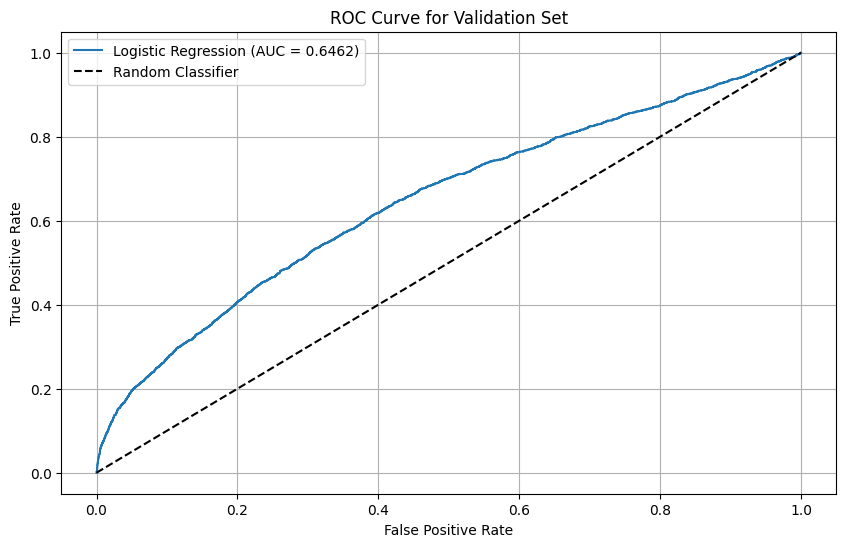

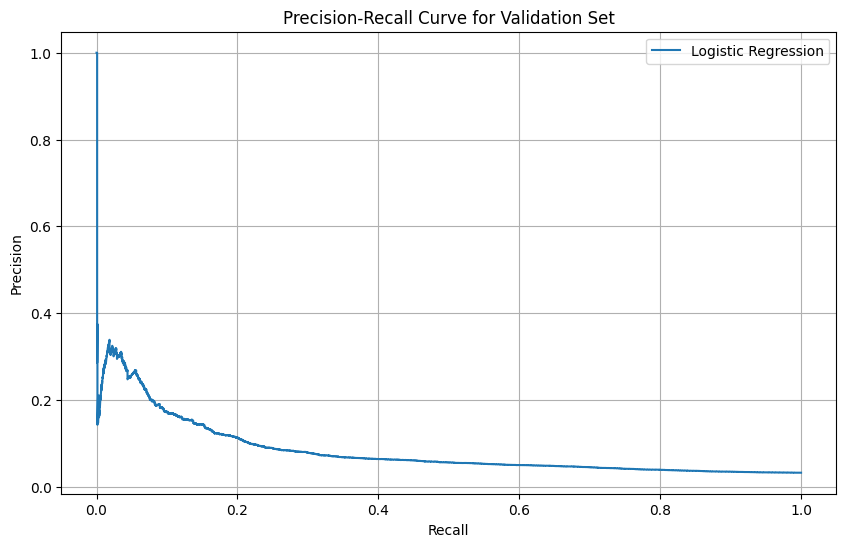

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# 1. Make predictions on the scaled validation data
y_pred_val = logistic_model.predict(X_val_scaled)
y_pred_proba_val = logistic_model.predict_proba(X_val_scaled)[:, 1]

# 2. Calculate and print standard classification metrics for the validation set
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)

print("\n--- Validation Set Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 3. Calculate and print the ROC AUC score for the validation set
roc_auc = roc_auc_score(y_val, y_pred_proba_val)
print(f"ROC AUC Score: {roc_auc:.4f}")

# 4. Define a threshold for 'tail risk prediction' and evaluate
tail_risk_threshold = 0.7  # Example threshold
y_pred_tail_risk = (y_pred_proba_val >= tail_risk_threshold).astype(int)

tail_risk_precision = precision_score(y_val, y_pred_tail_risk, zero_division=0)
tail_risk_recall = recall_score(y_val, y_pred_tail_risk, zero_division=0)

print(f"\n--- Tail Risk Prediction (Threshold >= {tail_risk_threshold}) ---")
print(f"Tail Risk Precision: {tail_risk_precision:.4f}")
print(f"Tail Risk Recall: {tail_risk_recall:.4f}")

# 5. Generate a classification report for the validation set
print("\n--- Classification Report (Validation Set) ---")
print(classification_report(y_val, y_pred_val))

# 6. Plot the ROC curve for the validation set
fpr, tpr, _ = roc_curve(y_val, y_pred_proba_val)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Set')
plt.legend()
plt.grid(True)
plt.show()

# 7. Plot a precision-recall curve for the validation set
precision_curve, recall_curve, _ = precision_recall_curve(y_val, y_pred_proba_val)
plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Validation Set')
plt.legend()
plt.grid(True)
plt.show()

## Final Model Evaluation on Test Set

### Subtask:
Perform a final, unbiased evaluation of the best-performing Logistic Regression model on the preprocessed 'test_data.csv'. Report comprehensive performance metrics, including those for tail risk prediction accuracy, and provide relevant visualizations with legends.


**Reasoning**:
To perform the final evaluation, I will use the trained logistic regression model to make predictions on the scaled test data. Then, I will calculate and display all the required classification metrics, including tail risk metrics, and generate the specified ROC and Precision-Recall curves to visualize the model's performance on the test set.




--- Test Set Metrics ---
Accuracy: 0.8034
Precision: 0.0634
Recall: 0.2895
F1-Score: 0.1040
ROC AUC Score: 0.5652

--- Tail Risk Prediction (Test Set, Threshold >= 0.7) ---
Tail Risk Precision: 0.2084
Tail Risk Recall: 0.0623

--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     79760
           1       0.06      0.29      0.10      3275

    accuracy                           0.80     83035
   macro avg       0.51      0.56      0.50     83035
weighted avg       0.93      0.80      0.86     83035



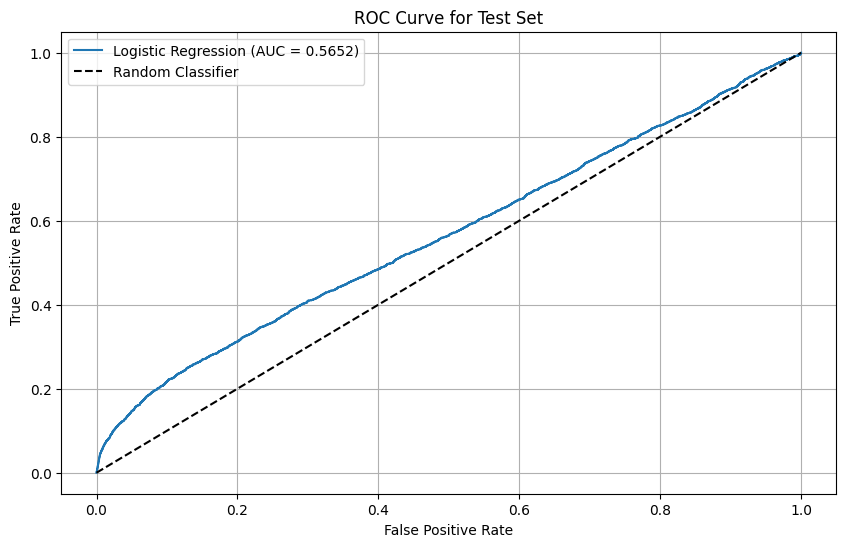

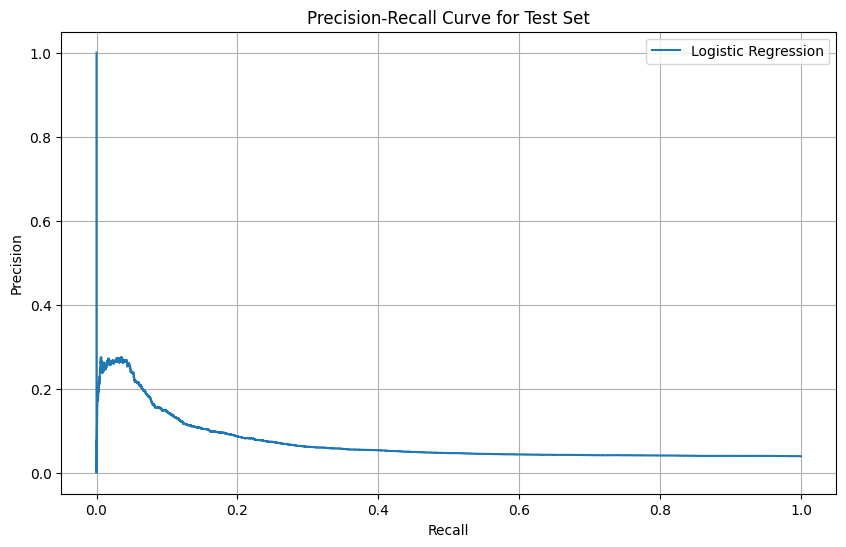

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve

# 1. Make predictions on the scaled test data
y_pred_test = logistic_model.predict(X_test_scaled)
y_pred_proba_test = logistic_model.predict_proba(X_test_scaled)[:, 1]

# 2. Calculate and print standard classification metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print("\n--- Test Set Metrics ---")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")

# 3. Calculate and print the ROC AUC score for the test set
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
print(f"ROC AUC Score: {roc_auc_test:.4f}")

# 4. Define a threshold for 'tail risk prediction' and evaluate
tail_risk_threshold_test = 0.7  # Using the same threshold as validation
y_pred_tail_risk_test = (y_pred_proba_test >= tail_risk_threshold_test).astype(int)

tail_risk_precision_test = precision_score(y_test, y_pred_tail_risk_test, zero_division=0)
tail_risk_recall_test = recall_score(y_test, y_pred_tail_risk_test, zero_division=0)

print(f"\n--- Tail Risk Prediction (Test Set, Threshold >= {tail_risk_threshold_test}) ---")
print(f"Tail Risk Precision: {tail_risk_precision_test:.4f}")
print(f"Tail Risk Recall: {tail_risk_recall_test:.4f}")

# 5. Generate a classification report for the test set
print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_pred_test))

# 6. Plot the ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, label=f'Logistic Regression (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 7. Plot a precision-recall curve for the test set
precision_curve_test, recall_curve_test, _ = precision_recall_curve(y_test, y_pred_proba_test)
plt.figure(figsize=(10, 6))
plt.plot(recall_curve_test, precision_curve_test, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Test Set')
plt.legend()
plt.grid(True)
plt.show()


## Final Task

### Subtask:
Summarize the entire process, including the Logistic Regression model's performance on both validation and test sets, specific insights from the tail risk prediction, and any conclusions regarding the model's ability to predict the 'Low' crypto data.


## Summary:

### Q&A

**1. What is the Logistic Regression model's performance on the validation set?**
On the validation set, the Logistic Regression model achieved an Accuracy of 0.8226, Precision of 0.0680, Recall of 0.3517, F1-Score of 0.1140, and an ROC AUC Score of 0.6462. For tail risk prediction (threshold $\ge$ 0.7), the precision was 0.2002 and recall was 0.0770.

**2. What is the Logistic Regression model's performance on the test set?**
On the test set, the Logistic Regression model achieved an Accuracy of 0.8034, Precision of 0.0634, Recall of 0.2895, F1-Score of 0.1040, and an ROC AUC Score of 0.5652. For tail risk prediction (threshold $\ge$ 0.7), the precision was 0.2084 and recall was 0.0623.

**3. What specific insights can be drawn from the tail risk prediction?**
The tail risk prediction, using a probability threshold of 0.7, showed a Precision of 0.2002 and Recall of 0.0770 on the validation set, and a Precision of 0.2084 and Recall of 0.0623 on the test set. This indicates that while the model correctly identifies a "tail risk event" (positive class) about 20% of the time when it predicts one, it only captures a small fraction (around 6-8%) of all actual tail risk events. The low recall suggests it misses a significant number of extreme events.

**4. What conclusions can be drawn regarding the model's ability to predict the 'Low' crypto data (represented by 'Tail_Risk_Event')?**
The Logistic Regression model, despite achieving an accuracy of over 80% on both validation and test sets, demonstrates limited ability to predict the 'Tail_Risk_Event' (the minority class representing low crypto values). The low Precision (around 0.06-0.07) and F1-Scores (around 0.10-0.11) for the positive class indicate that the model produces many false positives and struggles to reliably identify actual 'Tail_Risk_Events'. The ROC AUC scores of 0.6462 on validation and 0.5652 on test further confirm that its discriminative power for this specific event is weak, performing only slightly better than random chance on the test set. This suggests that while it performs well on the majority class (no tail risk event), it fails to effectively capture the rare 'Low' value events.

### Data Analysis Key Findings

*   **Data Loading and Preprocessing:** Three datasets (`train_data.csv`, `val_data.csv`, `test_data.csv`) were successfully loaded, containing 49 columns and 108,087, 69,993, and 83,035 entries respectively. Features (44 columns) and the target variable (`Tail_Risk_Event`) were separated, and numerical features were standardized using `StandardScaler` across all datasets.
*   **Model Training:** A Logistic Regression model was trained on the scaled training data, configured with `class_weight='balanced'` to address potential class imbalance.
*   **Validation Set Performance:**
    *   The model achieved an Accuracy of 0.8226, but low Precision (0.0680) and F1-Score (0.1140) for the positive class ('Tail_Risk_Event').
    *   The Recall for the positive class was 0.3517, indicating it identified about one-third of the actual events.
    *   The ROC AUC Score was 0.6462.
    *   For tail risk prediction (probability threshold $\ge$ 0.7), the Precision was 0.2002 and Recall was 0.0770.
*   **Test Set Performance:**
    *   Performance metrics on the unseen test set were slightly lower than on the validation set: Accuracy of 0.8034, Precision of 0.0634, and F1-Score of 0.1040 for the positive class.
    *   Recall for the positive class was 0.2895.
    *   The ROC AUC Score dropped to 0.5652, suggesting poor discriminative power, only slightly better than a random classifier (0.5).
    *   For tail risk prediction (probability threshold $\ge$ 0.7), the Precision was 0.2084 and Recall was 0.0623, indicating limited effectiveness in identifying rare extreme events.
*   **Imbalanced Classification Challenge:** The consistently high accuracy (around 80%) coupled with very low precision and F1-scores for the minority class (class 1, 'Tail_Risk_Event') highlights a significant class imbalance problem, where the model primarily predicts the majority class (class 0, no tail risk).

### Insights or Next Steps

*   **Address Class Imbalance More Robustly:** Given the poor performance on the minority class and low ROC AUC, explore more advanced techniques for imbalanced datasets beyond `class_weight='balanced'`. This could include oversampling techniques (e.g., SMOTE), undersampling, or using ensemble methods specifically designed for imbalance (e.g., EasyEnsemble, BalanceCascade).
*   **Feature Engineering and Model Exploration:** The current features might not be sufficiently predictive of 'Tail_Risk_Event'. Investigate creating new features that capture more extreme market conditions or volatility. Additionally, consider exploring more complex models such as Gradient Boosting Machines (XGBoost, LightGBM) or Random Forests, which often perform better on imbalanced and complex datasets.
